In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
df_train = pd.read_csv('C:/Users/Ennoble IP 1043/Desktop/EIP-DATA/paper work/hho_diabetes_with_cat_boost/dataset/Training.csv')
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


c:\Users\Ennoble IP 1043\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


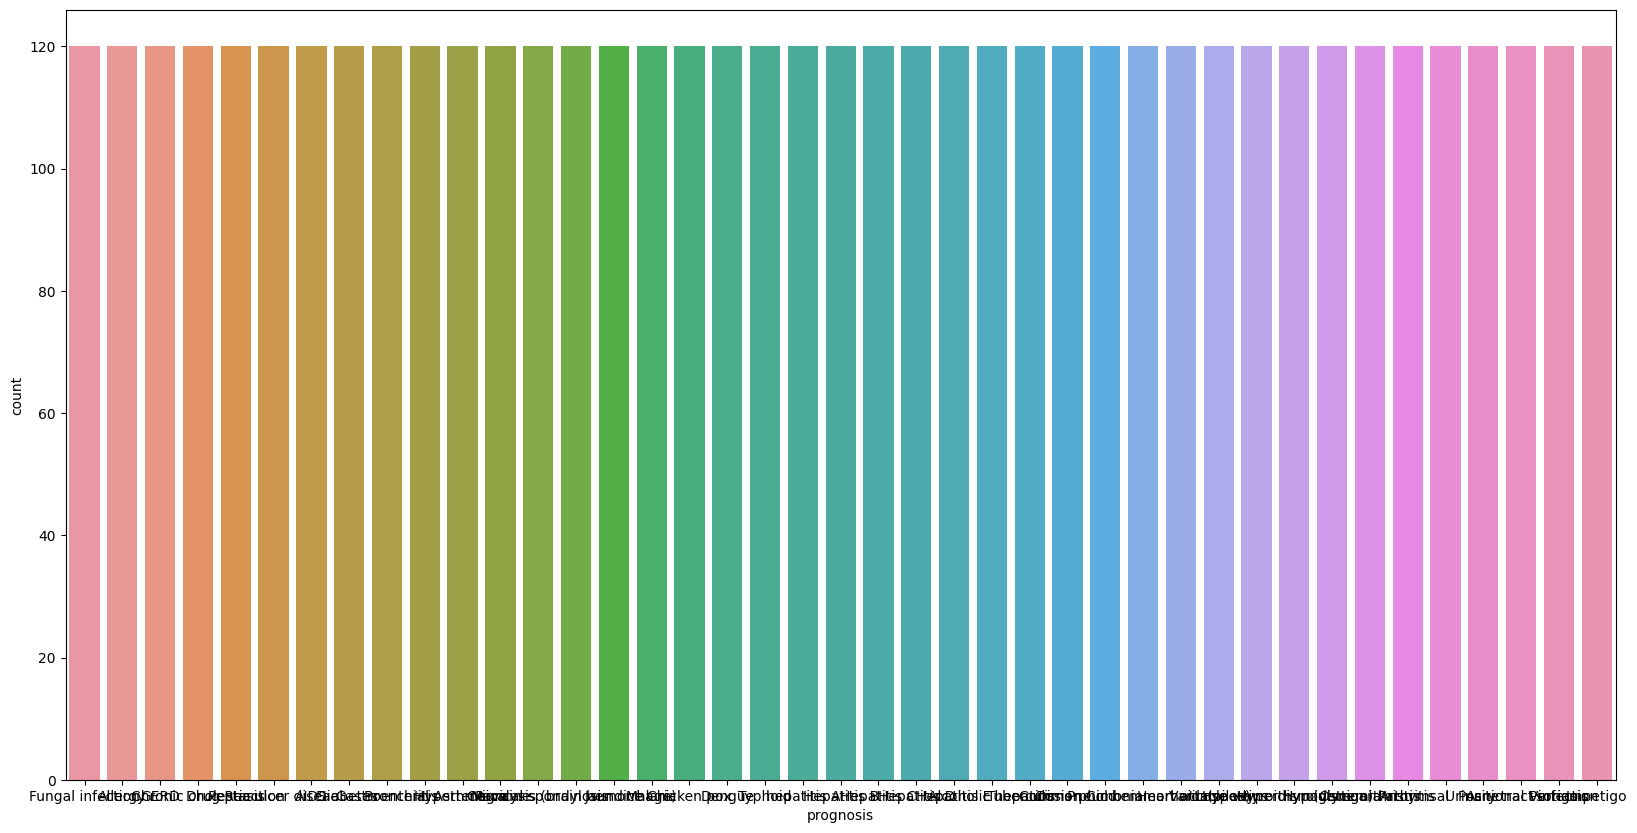

In [4]:
df_train.drop(columns='Unnamed: 133', inplace=True)
df_train.isnull().sum()
df_train['prognosis'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(df_train['prognosis'])
plt.show()

In [5]:
le = preprocessing.LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

In [6]:
df_test=pd.read_csv('C:/Users/Ennoble IP 1043/Desktop/EIP-DATA/paper work/hho_diabetes_with_cat_boost/dataset/Testing.csv')

In [7]:
df_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


c:\Users\Ennoble IP 1043\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


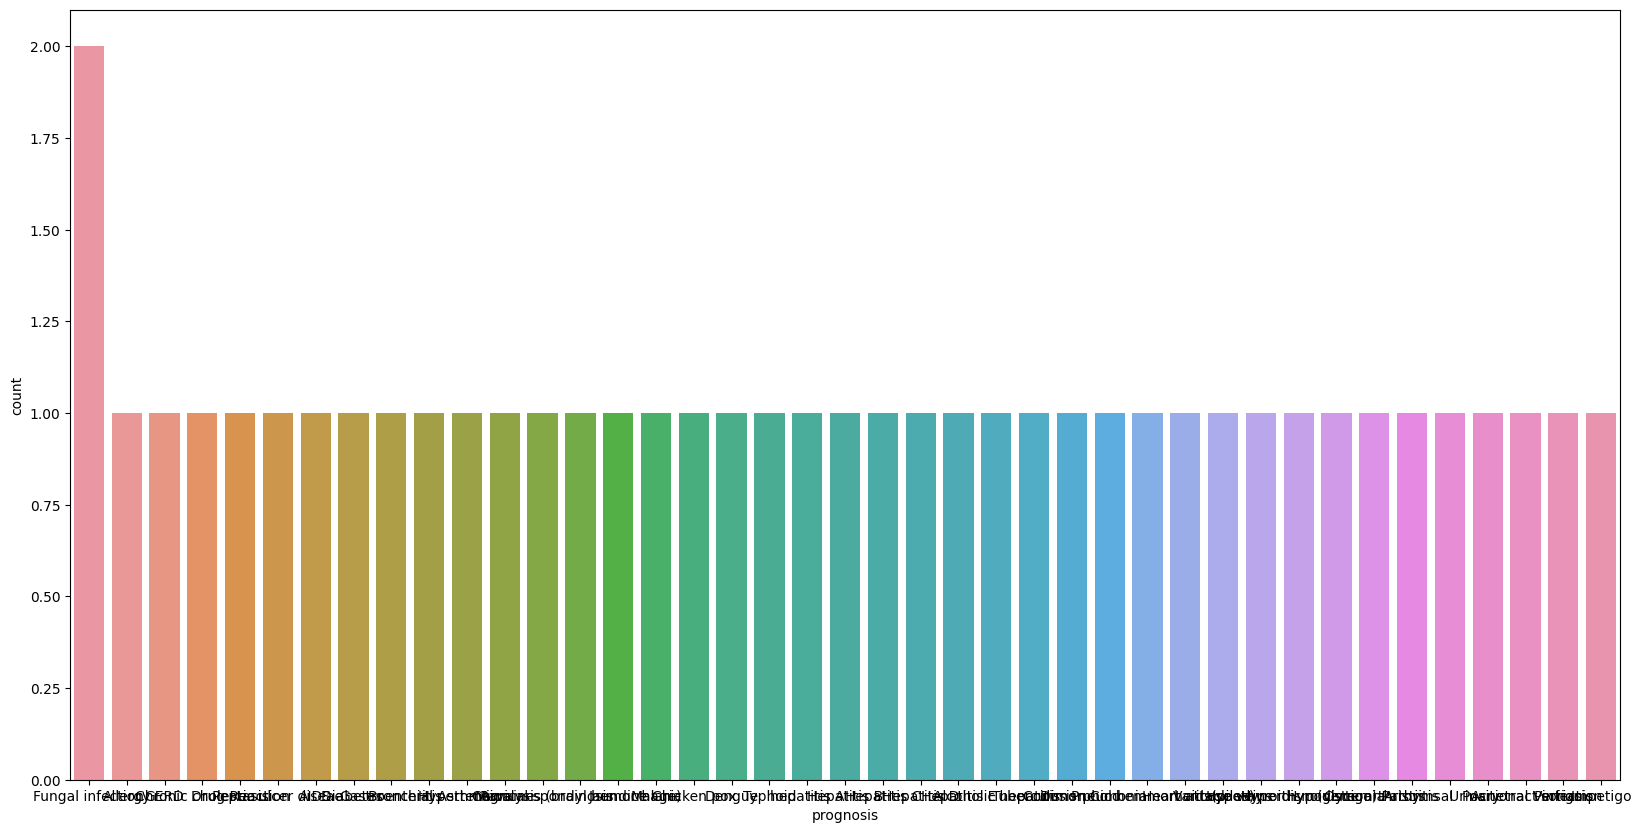

In [8]:
df_test.isnull().sum()
df_test['prognosis'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(df_test['prognosis'])
plt.show()

In [9]:
le = preprocessing.LabelEncoder()
df_test['prognosis'] = le.fit_transform(df_test['prognosis'])

In [10]:
X_train, X_test, y_train, y_test = df_train.drop(columns=['prognosis']),df_test.drop(columns=['prognosis']),df_train['prognosis'],df_test['prognosis']
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test)

(4920, 132)
(42, 132)
(4920,)
0     15
1      4
2     16
3      9
4     14
5     33
6      1
7     12
8     17
9      6
10    23
11    30
12     7
13    32
14    28
15    29
16     8
17    11
18    37
19    40
20    19
21    20
22    21
23    22
24     3
25    36
26    10
27    34
28    13
29    18
30    39
31    26
32    24
33    25
34    31
35     5
36     0
37     2
38    38
39    35
40    27
41    15
Name: prognosis, dtype: int32


# feature selection


In [11]:
from MVO import MVO

In [12]:
import math
def fitness_rastrigin(position):
  fitness_value = 0.0
  for i in range(len(position)):
    xi = position[i]
    fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
  return fitness_value

at poulation of 5
MVO is optimizing "fitness_rastrigin"
['At iteration 1 the best fitness is 1366.7429694648922']
['At iteration 2 the best fitness is 1216.6776192959587']
['At iteration 3 the best fitness is 1150.162370858919']
['At iteration 4 the best fitness is 1142.6972628190279']
['At iteration 5 the best fitness is 1084.590223889332']
['At iteration 6 the best fitness is 1001.2674835650879']
['At iteration 7 the best fitness is 933.4240900187459']
['At iteration 8 the best fitness is 919.086395175205']
['At iteration 9 the best fitness is 919.086395175205']
['At iteration 10 the best fitness is 919.086395175205']
['At iteration 11 the best fitness is 902.3176709646666']
['At iteration 12 the best fitness is 859.203165059154']
['At iteration 13 the best fitness is 847.0316607956631']
['At iteration 14 the best fitness is 847.0316607956631']
['At iteration 15 the best fitness is 847.0316607956631']
['At iteration 16 the best fitness is 845.421896819571']
['At iteration 17 the best

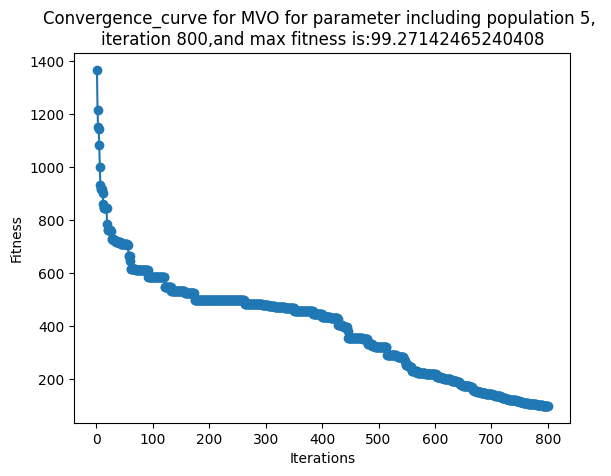

[  1   4   5   8   9  16  17  18  19  20  21  22  25  28  29  30  31  32
  33  36  38  45  46  47  49  51  52  57  60  61  64  66  67  68  70  71
  73  79  80  82  84  88  89  90  92  93  94  95  97  98  99 103 105 106
 108 110 112 113 115 119 121 122 128 129 130]
at poulation of 10
MVO is optimizing "fitness_rastrigin"
['At iteration 1 the best fitness is 1284.1372182518974']
['At iteration 2 the best fitness is 1160.3221233011145']
['At iteration 3 the best fitness is 1073.6877797332145']
['At iteration 4 the best fitness is 968.1851772440903']
['At iteration 5 the best fitness is 906.9510465979176']
['At iteration 6 the best fitness is 893.9417575423316']
['At iteration 7 the best fitness is 849.3675394604403']
['At iteration 8 the best fitness is 848.9107436858004']
['At iteration 9 the best fitness is 848.9107436858004']
['At iteration 10 the best fitness is 838.7328552957391']
['At iteration 11 the best fitness is 803.7961389151872']
['At iteration 12 the best fitness is 803.7961

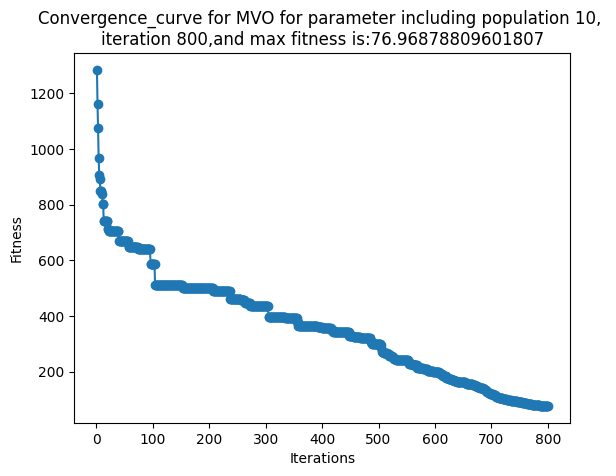

[  3   4   5  11  12  13  18  23  24  27  31  33  37  38  40  41  45  47
  49  50  51  53  55  56  57  59  60  61  62  66  67  68  69  70  72  75
  77  79  80  81  82  86  90  94  95  97 100 101 103 106 107 108 109 113
 114 116 117 118 119 124 125 127 131]
at poulation of 15
MVO is optimizing "fitness_rastrigin"
['At iteration 1 the best fitness is 1207.4242621603187']
['At iteration 2 the best fitness is 1107.2667431921097']
['At iteration 3 the best fitness is 1085.358571350677']
['At iteration 4 the best fitness is 1042.8372318248128']
['At iteration 5 the best fitness is 969.6957726979522']
['At iteration 6 the best fitness is 969.6957726979522']
['At iteration 7 the best fitness is 969.6957726979522']
['At iteration 8 the best fitness is 870.7276550349069']
['At iteration 9 the best fitness is 870.7276550349069']
['At iteration 10 the best fitness is 810.5607743124342']
['At iteration 11 the best fitness is 762.2770839033445']
['At iteration 12 the best fitness is 693.798044769285

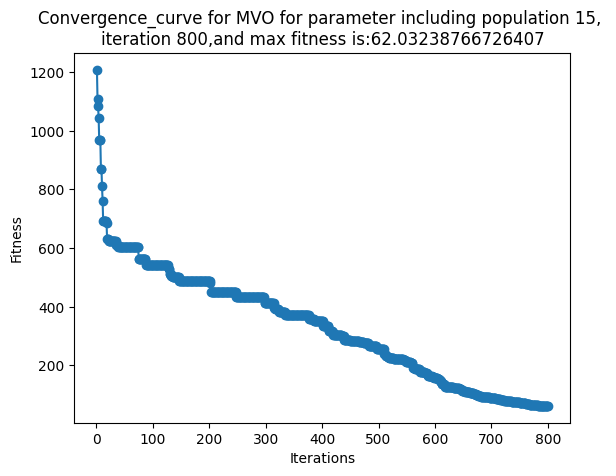

[  0   3   4   7  10  13  17  18  19  22  24  27  28  32  35  36  38  44
  48  49  53  54  56  57  59  60  61  62  64  70  71  72  73  75  78  82
  84  86  88  90  94  98  99 104 109 111 113 115 116 117 120 122 125 126
 127 129 131]
at poulation of 20
MVO is optimizing "fitness_rastrigin"
['At iteration 1 the best fitness is 1210.120868963275']
['At iteration 2 the best fitness is 1139.991569861406']
['At iteration 3 the best fitness is 990.6553147702682']
['At iteration 4 the best fitness is 990.6553147702682']
['At iteration 5 the best fitness is 986.0465152768884']
['At iteration 6 the best fitness is 790.1734035451553']
['At iteration 7 the best fitness is 790.1734035451553']
['At iteration 8 the best fitness is 790.1734035451553']
['At iteration 9 the best fitness is 790.1734035451553']
['At iteration 10 the best fitness is 756.9216835843637']
['At iteration 11 the best fitness is 756.9216835843637']
['At iteration 12 the best fitness is 756.9216835843637']
['At iteration 13 the b

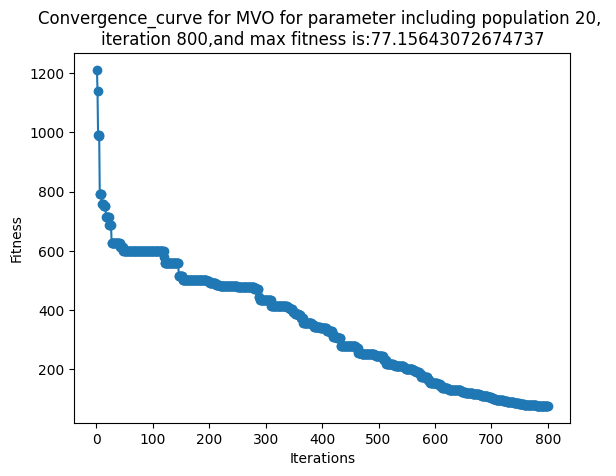

[  1   2   4   7   8  10  11  12  19  20  22  23  24  26  27  28  32  35
  36  38  41  43  44  45  46  47  48  50  52  53  54  60  61  62  64  65
  68  69  72  73  74  75  80  84  85  86  88  89  90  91  93  94  97  99
 100 101 103 104 105 108 111 112 113 114 117 119 120 123 124 126 127 128
 129 130 131]


In [13]:
# Load the data
for i in range(5, 25, 5):
    print(f"at poulation of {i}")
    data = MVO(fitness_rastrigin, 0, 1, 132, i, 800)
    fit, cost= data['p'], data['c']
    selected_features = np.where(fit > 0.5)[0]
        # selected_features = [9,13,14,39]
    print(selected_features)

       

In [ ]:
selected_features = '0   3   4   7  10  13  17  18  19  22 24  27  28  32  35  36  38  44 48  49  53  54  56  57  59  60  61  62  64  70  71  72  73  75  78  82 84  86  88  90  94  98  99 104 109 111 113 115 116 117 120 122 125 126
 127 129 131'
selected_features = selected_features.split()
print(selected_features,len(selected_features))

X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]